In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_data_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice.
total_mice = len(mouse_data_df["Mouse ID"].unique())
total_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_df.loc[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_df[mouse_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).mean()
median = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).median()
variance = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).var()
standard_dev = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).std()
sem = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": variance,
                              "Tumor Volume Std. Dev.": standard_dev,
                              "Tumor Volume Std. Err.": sem  
})

summary_stats.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_aggregate =  clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Pie and Bar Charts

Text(0, 0.5, 'Number of Mice Tested')

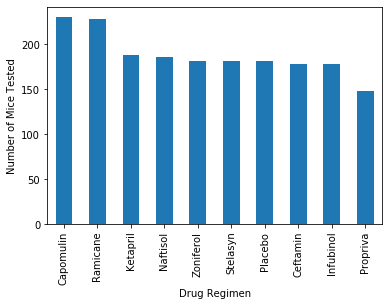

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count = clean_mouse_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar()  
# Set the xlabel and ylabel
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

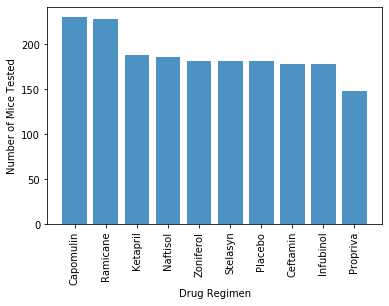

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

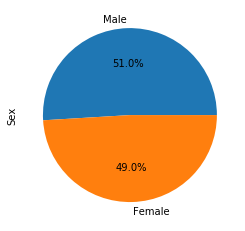

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = clean_mouse_df["Sex"].value_counts().plot(kind='pie', y='Sex', autopct='%1.1f%%')
gender_pie

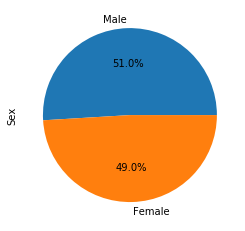

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_mouse_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%")

plt.show()

## Calculate Quartiles, Find Outliers, and Create a Box Plot

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#capomulin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
#ramicane = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane", :]
#infubinol = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol", :]
#ceftamin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin", :]

In [16]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_df.groupby('Mouse ID').max()['Timepoint']
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(last_timepoint, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged.loc[merged["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # append to empty list for plotting
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume > upper_bound) | (tumor_volume < lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


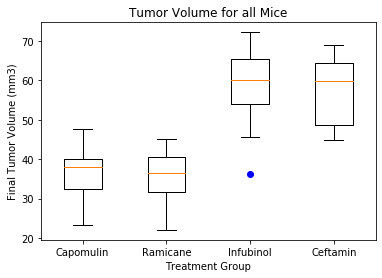

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig,ax = plt.subplots()
ax.set_title('Tumor Volume for all Mice')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Treatment Group')
ax.boxplot(tumor_vol_data, labels=treatment_list, sym='b')
plt.show()

## Line and Scatter Plots

In [19]:
# Get mouse treated by capomulin

capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
capomulin_treatment = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
capomulin_treatment

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207289,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


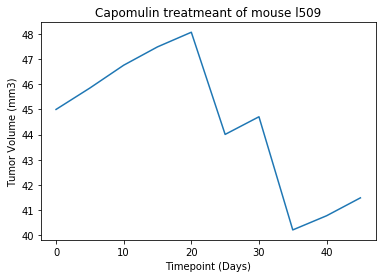

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
fig, ax = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(capomulin_treatment["Timepoint"], capomulin_treatment["Tumor Volume (mm3)"])
plt.show()

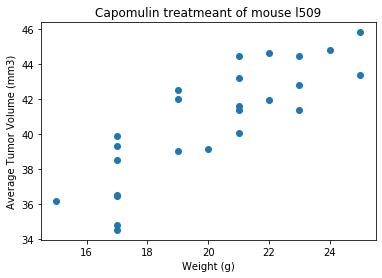

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
get_means = capomulin_df.groupby(["Mouse ID"]).mean()
fig, ax = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(get_means["Weight (g)"], get_means["Tumor Volume (mm3)"])
plt.show()

## Calculate Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(get_means["Weight (g)"], get_means["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


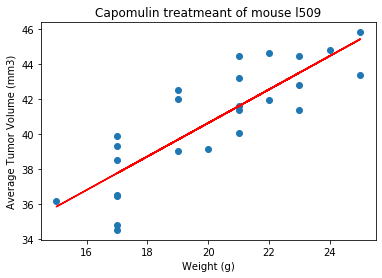

In [23]:
(slope, intercept) = np.polyfit(get_means["Weight (g)"], get_means["Tumor Volume (mm3)"], 1)
regression_values = get_means["Weight (g)"] * slope + intercept
equation_of_line = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
fig, ax = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(get_means["Weight (g)"], get_means["Tumor Volume (mm3)"])
plt.plot(get_means["Weight (g)"], regression_values, color='red')
plt.show()